### Visualización de datos

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

df = pd.read_csv("iris.csv", header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


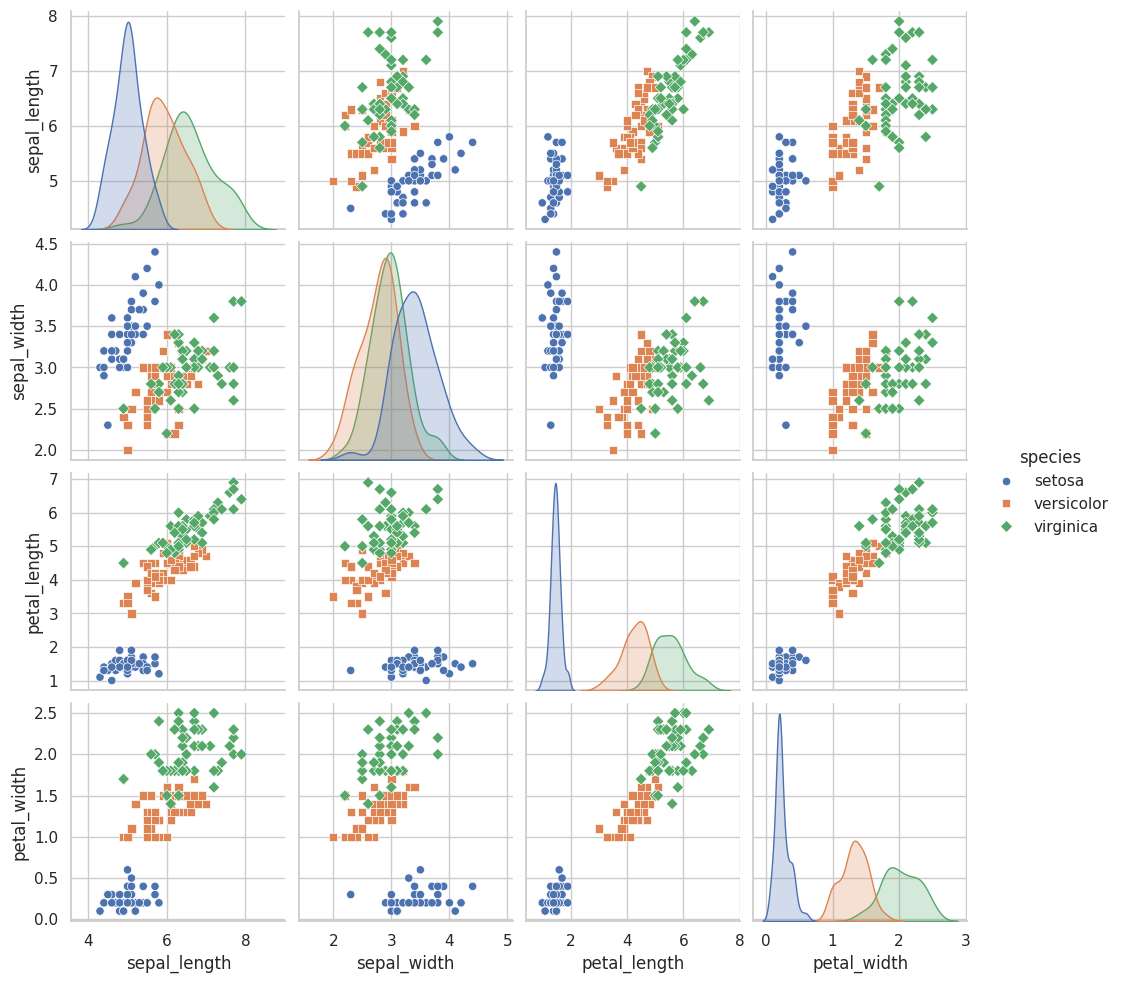

In [2]:
sns.set(style="whitegrid")
variables = df.columns[:-1]  # la última columna es la etiqueta (especie)
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.show()

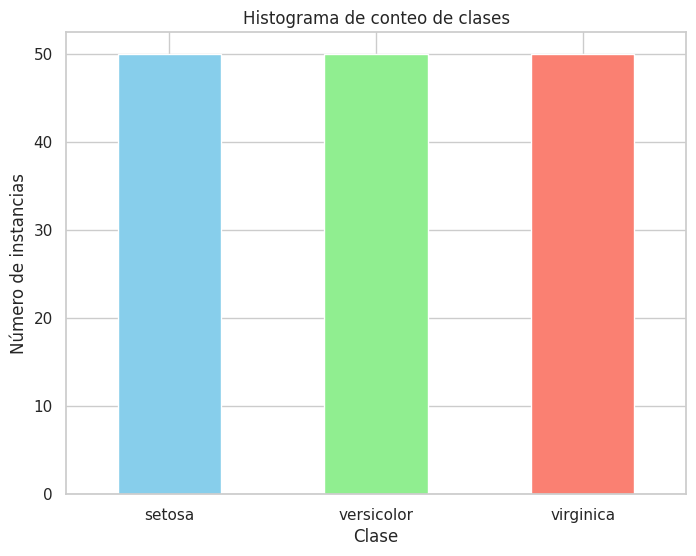

In [3]:
# Conteo de cuántas flores son de cada clase
class_counts = df['species'].value_counts()

# Graficar el histograma de conteo de clases
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel('Clase')
plt.ylabel('Número de instancias')
plt.title('Histograma de conteo de clases')
plt.xticks(rotation=0)  # Ajustar la rotación de las etiquetas del eje x
plt.show()

### Importancia de características

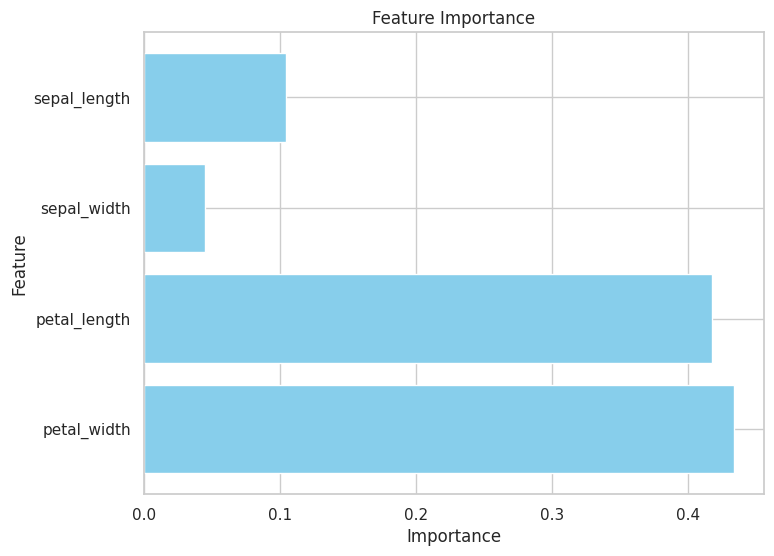

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Preparar los datos
X = df.drop('species', axis=1).values
y = df['species'].values

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar un clasificador RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

# Obtener la importancia de características
feature_importance = forest.feature_importances_

# Graficar la importancia de características
plt.figure(figsize=(8, 6))
plt.barh(df.columns[:-1], feature_importance, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

### Random Forest

Best parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 70} with accuracy: 0.97
Cross-validated accuracy with best parameters: 0.97


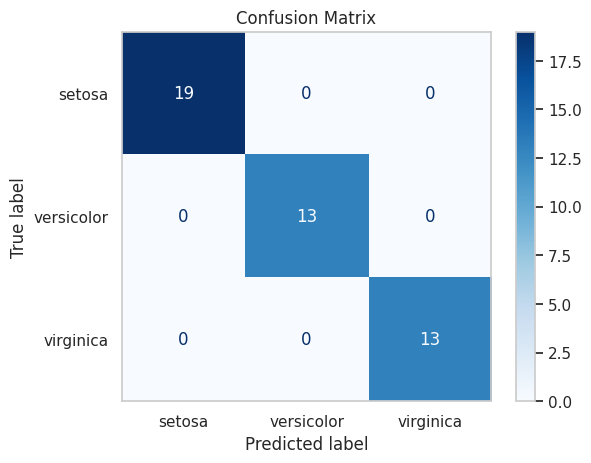

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import randint

# Preparar los datos
X = df.drop('species', axis=1).values
y = df['species'].values

# Definir el espacio de valores de los hiperparámetros a evaluar
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

# Configurar la búsqueda aleatoria de hiperparámetros
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=10, scoring='accuracy', random_state=42, n_jobs=-1)

# Buscar los mejores hiperparámetros
random_search.fit(X, y)

# Obtener los mejores hiperparámetros
best_params = random_search.best_params_
best_score = random_search.best_score_
print(f"Best parameters: {best_params} with accuracy: {best_score:.2f}")

# Evaluar el modelo con los mejores hiperparámetros encontrados usando validación cruzada
best_rf = RandomForestClassifier(**best_params, random_state=42)
final_scores = cross_val_score(best_rf, X, y, cv=10, scoring='accuracy')
print(f"Cross-validated accuracy with best parameters: {np.mean(final_scores):.2f}")

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
class_names = df['species'].unique()

# Mostrar la matriz de confusión con etiquetas y sin rejilla
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
cm_display.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.grid(False)

# Mostrar la figura
plt.show()

### KNN

Best K: 13 with accuracy: 0.98
Cross-validated accuracy with best K: 0.98


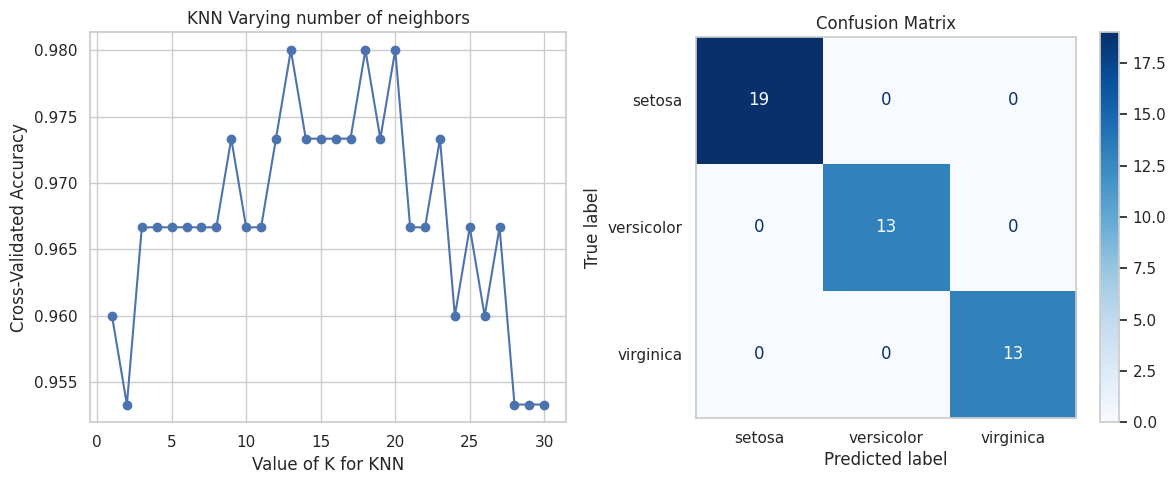

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Definir el rango de valores de K a evaluar
k_range = range(1, 31)
k_scores = []

# Preparar los datos
X = df.drop('species', axis=1).values
y = df['species'].values

# Evaluar cada valor de K usando validación cruzada con la métrica de precisión
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(np.mean(scores))

# Encontrar el valor de K con la mejor precisión media
best_k = k_range[np.argmax(k_scores)]
best_score = max(k_scores)
print(f"Best K: {best_k} with accuracy: {best_score:.2f}")

# Evaluar el modelo con el mejor valor de K encontrado usando validación cruzada
best_knn = KNeighborsClassifier(n_neighbors=best_k)
final_scores = cross_val_score(best_knn, X, y, cv=10, scoring='accuracy')
print(f"Cross-validated accuracy with best K: {np.mean(final_scores):.2f}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
class_names = df['species'].unique()

# Crear la figura y los subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Graficar la precisión media en función de K
ax[0].plot(k_range, k_scores, marker='o')
ax[0].set_xlabel('Value of K for KNN')
ax[0].set_ylabel('Cross-Validated Accuracy')
ax[0].set_title('KNN Varying number of neighbors')

# Mostrar la matriz de confusión con etiquetas y sin rejilla
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
cm_display.plot(ax=ax[1], cmap='Blues', values_format='d')
ax[1].set_title('Confusion Matrix')
ax[1].grid(False)

# Ajustar la disposición y mostrar la figura
plt.tight_layout()
plt.show()

### Naive Bayes

Accuracy with cross-validation: 0.95


<Figure size 600x600 with 0 Axes>

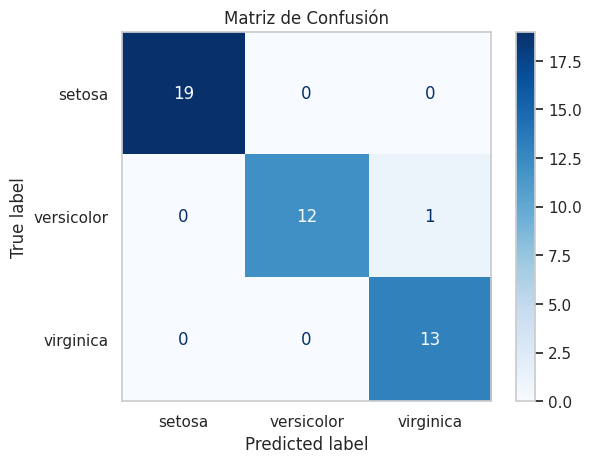

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

class NaiveBayes(BaseEstimator):
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # Calcular la probabilidad previa P(C)
        self._priors = np.zeros(n_classes)
        for idx, c in enumerate(self._classes):
            self._priors[idx] = np.sum(y == c) / n_samples

        # Calcular la media y varianza de P(X|C) para cada característica
        self._mean = np.zeros((n_classes, n_features))
        self._var = np.zeros((n_classes, n_features))
        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(- (x - mean)**2 / (2 * var)) # Construimos la normal con la media y desviación estándar de cada clase
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

    def _predict(self, x):
        posteriors = []
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x))) # la suma de logaritmos es equivalente al producto de probabilidades
            posterior += prior
            posteriors.append(posterior)
        return self._classes[np.argmax(posteriors)]

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

    def get_params(self, deep=True):
        return {}

# Preparar los datos
X = df.drop('species', axis=1).values
y = df['species'].values

# Entrenar el modelo Naive Bayes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
nb = NaiveBayes()
nb.fit(X_train, y_train)

# Evaluar el modelo Naive Bayes usando validación cruzada
scores = cross_val_score(nb, X, y, cv=10)
print(f"Accuracy with cross-validation: {np.mean(scores):.2f}")

# Predecir las etiquetas del conjunto de prueba
y_pred = nb.predict(X_test)

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
class_names = df['species'].unique()

# Crear una nueva figura para mostrar la matriz de confusión
plt.figure(figsize=(6, 6))

# Mostrar la matriz de confusión con etiquetas y sin rejilla
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
cm_display.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusión')
plt.grid(False)

# Mostrar la figura
plt.show()

### Modelo jerárquico de  Bayes

In [12]:
df_test = pd.read_csv("copia_iris.csv", header=0)
print("Valores borrados: 3.5, 3")

# Separar datos completos y faltantes
df_complete = df_test.dropna(subset=['sepal_width'])
df_missing = df_test[df_test['sepal_width'].isna()]

X_complete = df_complete.drop('sepal_width', axis=1).values
y_complete = df_complete['sepal_width'].values

# Definir el número de iteraciones de muestreo
num_samples = 15000

# Definir las distribuciones a priori para los parámetros del modelo
mu_prior_mean = np.mean(y_complete)
mu_prior_std = np.std(y_complete)
sigma_prior_scale = np.std(y_complete)

# Inicializar listas para almacenar las muestras de los parámetros
mu_samples = []
sigma_samples = []

# Muestreo de los parámetros del modelo utilizando el algoritmo Metropolis-Hastings
current_mu = np.random.normal(mu_prior_mean, mu_prior_std)
current_sigma = np.random.exponential(sigma_prior_scale)

for _ in range(num_samples):
    # Propuesta para el nuevo valor de mu
    new_mu = np.random.normal(current_mu, 0.1)

    # Propuesta para el nuevo valor de sigma utilizando una distribución log-normal
    new_sigma = np.random.lognormal(np.log(current_sigma), 0.1)

    # Calcula la probabilidad logarítmica posterior para el nuevo valor de mu
    log_prob_current_mu = np.sum(-0.5 * np.log(2 * np.pi * current_sigma ** 2) -
                                  0.5 * ((y_complete - current_mu) / current_sigma) ** 2)
    log_prob_new_mu = np.sum(-0.5 * np.log(2 * np.pi * new_sigma ** 2) -
                              0.5 * ((y_complete - new_mu) / new_sigma) ** 2)

    # Calcula la probabilidad logarítmica de la prior
    log_prior_current_mu = -0.5 * ((current_mu - mu_prior_mean) / mu_prior_std) ** 2
    log_prior_new_mu = -0.5 * ((new_mu - mu_prior_mean) / mu_prior_std) ** 2

    # Calcula la razón de aceptación
    log_acceptance_ratio_mu = (log_prob_new_mu + log_prior_new_mu) - (log_prob_current_mu + log_prior_current_mu)

    # Determina si se acepta la nueva muestra de mu
    if np.log(np.random.uniform()) < log_acceptance_ratio_mu:
        current_mu = new_mu

    # Calcula la probabilidad logarítmica posterior para el nuevo valor de sigma
    log_prob_current_sigma = np.sum(-np.log(current_sigma) - 0.5 * ((y_complete - current_mu) / current_sigma) ** 2)
    log_prob_new_sigma = np.sum(-np.log(new_sigma) - 0.5 * ((y_complete - current_mu) / new_sigma) ** 2)

    # Calcula la razón de aceptación
    log_acceptance_ratio_sigma = log_prob_new_sigma - log_prob_current_sigma

    # Determina si se acepta la nueva muestra de sigma
    if np.log(np.random.uniform()) < log_acceptance_ratio_sigma:
        current_sigma = new_sigma

    # Agrega las muestras a las listas
    mu_samples.append(current_mu)
    sigma_samples.append(current_sigma)

# Calcular los intervalos creíbles para los valores imputados
mu_samples = np.array(mu_samples)
sigma_samples = np.array(sigma_samples)

# Imputar los valores faltantes utilizando las estimaciones posteriores
imputed_values = []
for _ in range(len(df_missing)):
    sampled_mu = np.random.choice(mu_samples)
    sampled_sigma = np.random.choice(sigma_samples)

    # Imputa un valor faltante basado en la distribución posterior
    imputed_value = np.random.normal(sampled_mu, sampled_sigma)
    imputed_values.append(imputed_value)

# Calcular el intervalo creíble del 95% para los valores imputados
credible_intervals = np.percentile(imputed_values, [2.5, 97.5])

# Reemplaza los valores faltantes en el dataframe original y muestra los intervalos creíbles
for idx, row_idx in enumerate(df_test.index[df_test['sepal_width'].isna()]):
    print("\nÍndice de fila:", row_idx)
    print("Valor imputado:", imputed_values[idx])
    print("Intervalo creíble 95%:", credible_intervals)
    df_test.loc[row_idx, 'sepal_width'] = imputed_values[idx]

Valores borrados: 3.5, 3

Índice de fila: 0
Valor imputado: 3.5092561716352417
Intervalo creíble 95%: [2.85278139 3.49242349]

Índice de fila: 149
Valor imputado: 2.8359487069325997
Intervalo creíble 95%: [2.85278139 3.49242349]
